In [1209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = 200   # show 200 rows
import joblib


In [1210]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [1211]:
df = pd.read_csv('Dataset\job_placement.csv')

df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [1212]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (700, 11)


In [1213]:
print("Null Values")
df.isnull().sum()

Null Values


id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

In [1214]:
print(f"Duplicated Values: {df.duplicated().sum()}")

Duplicated Values: 0


In [1215]:
print("Description Of Dataset")
df.describe()

Description Of Dataset


,id,age,salary,gpa,years_of_experience
count,700.00000,700.000000,700.000000,700.000000,699.000000
mean,350.50000,24.411429,52474.285714,3.750429,2.177396
std,202.21688,1.164268,25160.331005,0.121212,0.779393
min,1.00000,23.000000,0.000000,3.400000,1.000000
25%,175.75000,23.000000,61000.000000,3.700000,2.000000
50%,350.50000,24.000000,64000.000000,3.800000,2.000000
75%,525.25000,26.000000,66000.000000,3.900000,3.000000
max,700.00000,26.000000,68000.000000,3.900000,3.000000


In [1216]:
print("Row having column ['years_of_experience'] as a missing value")

df[df['years_of_experience'].isnull() == True]

Row having column ['years_of_experience'] as a missing value


,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
544,545,Sophia Johnson,Female,24,Bachelor's,Mechanical Engineering,University of California--Santa Cruz,Placed,60000,3.7,NaN


In [1217]:
df['years_of_experience'] = df['years_of_experience'].fillna(df['years_of_experience'].mean())

In [1218]:
print("Current Number Of Null Values")
df.isnull().sum()

Current Number Of Null Values


id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

In [1219]:
df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [1220]:
list(df['gender'].unique())

['Male', 'Female']

In [1221]:
lst = ['gender', 'age', 'degree', 'college_name', 'stream', 'salary', 'placement_status']

for i in lst:
    print(f"Unique values for {i}: {list(df[i].unique())}\n")

Unique values for gender: ['Male', 'Female']

Unique values for age: [25, 24, 26, 23]

Unique values for degree: ["Bachelor's"]

Unique values for college_name: ['Harvard University', 'Massachusetts Institute of Technology', 'Stanford University', 'Yale University', 'Princeton University', 'Columbia University', 'California Institute of Technology', 'University of Chicago', 'University of Pennsylvania', 'Northwestern University', 'Duke University', 'Johns Hopkins University', 'University of California--Berkeley', 'University of Michigan--Ann Arbor', 'University of California--Los Angeles', 'University of Virginia', 'University of Wisconsin--Madison', 'University of Illinois--Urbana-Champaign', 'University of North Carolina--Chapel Hill', 'University of Washington', 'University of California--San Diego', 'University of Texas--Austin', 'University of California--Santa Barbara', 'University of Southern California', 'University of Florida', 'University of Minnesota--Twin Cities', 'Universi

In [1222]:
print("Number of times college names are repeated")
df['college_name'].value_counts()

Number of times college names are repeated


college_name
University of Michigan--Ann Arbor            43
University of California--Berkeley           43
University of Colorado--Boulder              43
University of Illinois--Urbana-Champaign     43
University of Virginia                       43
University of North Carolina--Chapel Hill    42
University of Maryland--College Park         42
University of California--Santa Cruz         42
University of Pennsylvania                   40
University of Washington                     40
University of California--Riverside          34
University of California--San Francisco      34
University of Rochester                      34
University of Delaware                       34
University of Texas--Dallas                  34
University of Connecticut                    33
University of California--Los Angeles        23
University of Texas--Austin                  18
University of California--San Diego          10
University of California--Irvine              1
University of Pittsburgh   

In [1223]:
# Split all people having placed vs not placed

placed = df[df['placement_status'] == 'Placed']
not_placed = df[df['placement_status'] == 'Not Placed']

Placed Dataset Preprocessing

In [1224]:
placed.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
5,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0


In [1225]:
# Convert best colleges to dictionary

Dict_College = placed['college_name'].value_counts().to_dict()
Dict_College

{'University of Colorado--Boulder': 43,
 'University of Illinois--Urbana-Champaign': 43,
 'University of California--Berkeley': 43,
 'University of Michigan--Ann Arbor': 43,
 'University of Virginia': 42,
 'University of Maryland--College Park': 42,
 'University of Washington': 40,
 'University of Texas--Dallas': 34,
 'University of California--San Francisco': 34,
 'University of Delaware': 34,
 'University of California--Santa Cruz': 34,
 'University of Rochester': 34,
 'University of Connecticut': 33,
 'University of California--Los Angeles': 23,
 'University of Texas--Austin': 17,
 'University of California--San Diego': 10,
 'Georgetown University': 1,
 'University of Notre Dame': 1,
 'University of California--Irvine': 1,
 'Rice University': 1,
 'University of Pittsburgh': 1,
 'University of Iowa': 1,
 'Harvard University': 1,
 'University of California--Davis': 1,
 'University of Florida': 1,
 'Massachusetts Institute of Technology': 1,
 'University of California--Santa Barbara': 

In [1226]:
best_colleges_placed = []

for key, values in Dict_College.items():
    if values > 20:
        best_colleges_placed.append(key)

best_colleges_placed

['University of Colorado--Boulder',
 'University of Illinois--Urbana-Champaign',
 'University of California--Berkeley',
 'University of Michigan--Ann Arbor',
 'University of Virginia',
 'University of Maryland--College Park',
 'University of Washington',
 'University of Texas--Dallas',
 'University of California--San Francisco',
 'University of Delaware',
 'University of California--Santa Cruz',
 'University of Rochester',
 'University of Connecticut',
 'University of California--Los Angeles']

In [1227]:
best_colleges_placed[4].split(' ')[-1]

'Virginia'

In [1228]:
def location(College):

    if len(College.split('--')) > 1:
        return College.split('--')[-1]
    else:
        return College.split(' ')[-1]
    
location(best_colleges_placed[4])

'Virginia'

In [1229]:
loc = []
for i in range(0, len(best_colleges_placed)):

    loc.append(location(best_colleges_placed[i]))

loc

['Boulder',
 'Urbana-Champaign',
 'Berkeley',
 'Ann Arbor',
 'Virginia',
 'College Park',
 'Washington',
 'Dallas',
 'San Francisco',
 'Delaware',
 'Santa Cruz',
 'Rochester',
 'Connecticut',
 'Los Angeles']

In [1230]:
final_dict = dict(zip(best_colleges_placed, loc))

final_dict

{'University of Colorado--Boulder': 'Boulder',
 'University of Illinois--Urbana-Champaign': 'Urbana-Champaign',
 'University of California--Berkeley': 'Berkeley',
 'University of Michigan--Ann Arbor': 'Ann Arbor',
 'University of Virginia': 'Virginia',
 'University of Maryland--College Park': 'College Park',
 'University of Washington': 'Washington',
 'University of Texas--Dallas': 'Dallas',
 'University of California--San Francisco': 'San Francisco',
 'University of Delaware': 'Delaware',
 'University of California--Santa Cruz': 'Santa Cruz',
 'University of Rochester': 'Rochester',
 'University of Connecticut': 'Connecticut',
 'University of California--Los Angeles': 'Los Angeles'}

In [1231]:
placed.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
5,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0


In [1232]:
placed['location'] = placed['college_name'].map(final_dict)

placed.head()

C:\Users\siddhu\AppData\Local\Temp\ipykernel_12476\3307064387.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0,NaN
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0,NaN
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0,NaN
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0,NaN
5,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0,NaN


In [1233]:
print(f"Shape of placed dataframe {placed.shape}")

Shape of placed dataframe (570, 12)


In [1234]:
print(f"Null values of placed dataframe \n{placed.isnull().sum()}")

Null values of placed dataframe 
id                      0
name                    0
gender                  0
age                     0
degree                  0
stream                  0
college_name            0
placement_status        0
salary                  0
gpa                     0
years_of_experience     0
location               48
dtype: int64


In [1235]:
# Only 48 rows are affected which are not best colleges

placed = placed[placed['college_name'].isin(best_colleges_placed)]

placed.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
12,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
13,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
14,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
17,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
19,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1236]:
print(f"Null values of placed dataframe \n{placed.isnull().sum()}")

Null values of placed dataframe 
id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
location               0
dtype: int64


Not Placed Dataset Preprocessing

In [1237]:
# Convert best colleges to dictionary

Dict_College = not_placed['college_name'].value_counts().to_dict()
Dict_College

{'University of North Carolina--Chapel Hill': 41,
 'University of Pennsylvania': 39,
 'University of California--Riverside': 34,
 'University of California--Santa Cruz': 8,
 'Yale University': 1,
 'University of Chicago': 1,
 'Johns Hopkins University': 1,
 'University of Virginia': 1,
 'University of Texas--Austin': 1,
 'University of Minnesota--Twin Cities': 1,
 'Boston College': 1,
 'University of Georgia': 1}

In [1238]:
Not_placed_colleges = []

for key, values in Dict_College.items():
    if values > 20:
        Not_placed_colleges.append(key)

Not_placed_colleges

['University of North Carolina--Chapel Hill',
 'University of Pennsylvania',
 'University of California--Riverside']

In [1239]:
Not_placed_colleges[1].split(' ')[-1]

'Pennsylvania'

In [1240]:
def location(College):

    if len(College.split('--')) > 1:
        return College.split('--')[-1]
    else:
        return College.split(' ')[-1]
    
location(Not_placed_colleges[1])

'Pennsylvania'

In [1241]:
loc = []
for i in range(0, len(Not_placed_colleges)):

    loc.append(location(Not_placed_colleges[i]))

loc

['Chapel Hill', 'Pennsylvania', 'Riverside']

In [1242]:
final_dict = dict(zip(Not_placed_colleges, loc))

final_dict

{'University of North Carolina--Chapel Hill': 'Chapel Hill',
 'University of Pennsylvania': 'Pennsylvania',
 'University of California--Riverside': 'Riverside'}

In [1243]:
not_placed.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
7,8,Emma Garcia,Female,24,Bachelor's,Computer Science,University of Chicago,Not Placed,0,3.6,2.0
11,12,Ava Lopez,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0
15,16,Isabella Perez,Female,25,Bachelor's,Mechanical Engineering,University of Virginia,Not Placed,0,3.7,2.0
21,22,Elizabeth Wood,Female,26,Bachelor's,Mechanical Engineering,University of Texas--Austin,Not Placed,0,3.8,3.0


In [1244]:
not_placed['location'] = not_placed['college_name'].map(final_dict)

not_placed.head()

C:\Users\siddhu\AppData\Local\Temp\ipykernel_12476\567192272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0,NaN
7,8,Emma Garcia,Female,24,Bachelor's,Computer Science,University of Chicago,Not Placed,0,3.6,2.0,NaN
11,12,Ava Lopez,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0,NaN
15,16,Isabella Perez,Female,25,Bachelor's,Mechanical Engineering,University of Virginia,Not Placed,0,3.7,2.0,NaN
21,22,Elizabeth Wood,Female,26,Bachelor's,Mechanical Engineering,University of Texas--Austin,Not Placed,0,3.8,3.0,NaN


In [1245]:
print(f"Shape of placed dataframe {not_placed.shape}")

Shape of placed dataframe (130, 12)


In [1246]:
print(f"Null values of placed dataframe \n{not_placed.isnull().sum()}")

Null values of placed dataframe 
id                      0
name                    0
gender                  0
age                     0
degree                  0
stream                  0
college_name            0
placement_status        0
salary                  0
gpa                     0
years_of_experience     0
location               16
dtype: int64


In [1247]:
# Only 16 rows are affected where not placed is very less

not_placed = not_placed[not_placed['college_name'].isin(Not_placed_colleges)]

not_placed.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
40,41,Daniel Martinez,Male,24,Bachelor's,Computer Science,University of California--Riverside,Not Placed,0,3.9,2.0,Riverside
50,51,Elijah Kelly,Male,23,Bachelor's,Electrical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0,Pennsylvania
55,56,Olivia Moore,Female,25,Bachelor's,Computer Science,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0,Chapel Hill
60,61,Daniel Martinez,Male,24,Bachelor's,Computer Science,University of California--Riverside,Not Placed,0,3.9,2.0,Riverside
70,71,Elijah Kelly,Male,23,Bachelor's,Electrical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0,Pennsylvania


In [1248]:
print(f"Null values of placed dataframe \n{not_placed.isnull().sum()}")

Null values of placed dataframe 
id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
location               0
dtype: int64


In [1249]:
print(f"Shape of not_placed dataframe {not_placed.shape}")
print(f"Shape of placed dataframe {placed.shape}")

Shape of not_placed dataframe (114, 12)
Shape of placed dataframe (522, 12)


Completed filtering from both datasets

In [1250]:
# Combine total rows in both datasets

print(f'Total number of rows after preprocessing: {placed.shape[0] + not_placed.shape[0]}')

Total number of rows after preprocessing: 636


In [1251]:
# Combine both datasets

updated_df = pd.concat([placed, not_placed], ignore_index=True, sort=False)

updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1252]:
updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


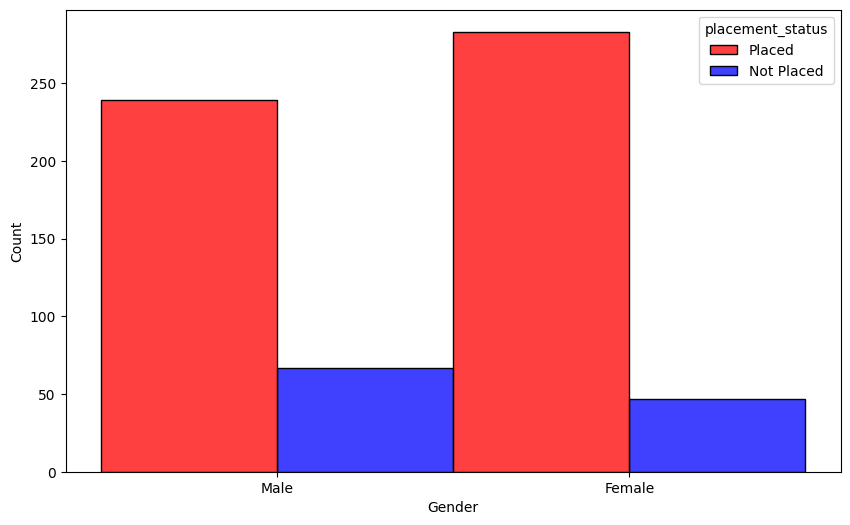

In [1253]:
plt.figure(figsize=(10, 6))
sns.histplot(x='gender', data=updated_df, hue='placement_status', palette={'Placed': 'red', 'Not Placed': 'blue'}, multiple='dodge')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [1254]:
fig = px.pie(data_frame=updated_df, names='stream', opacity=0.9, title='Stream count of all students in dataset')
fig.update_traces(
    textinfo='percent',
    textfont=dict(size=15, color='black', family='Arial'),
)

fig.show()

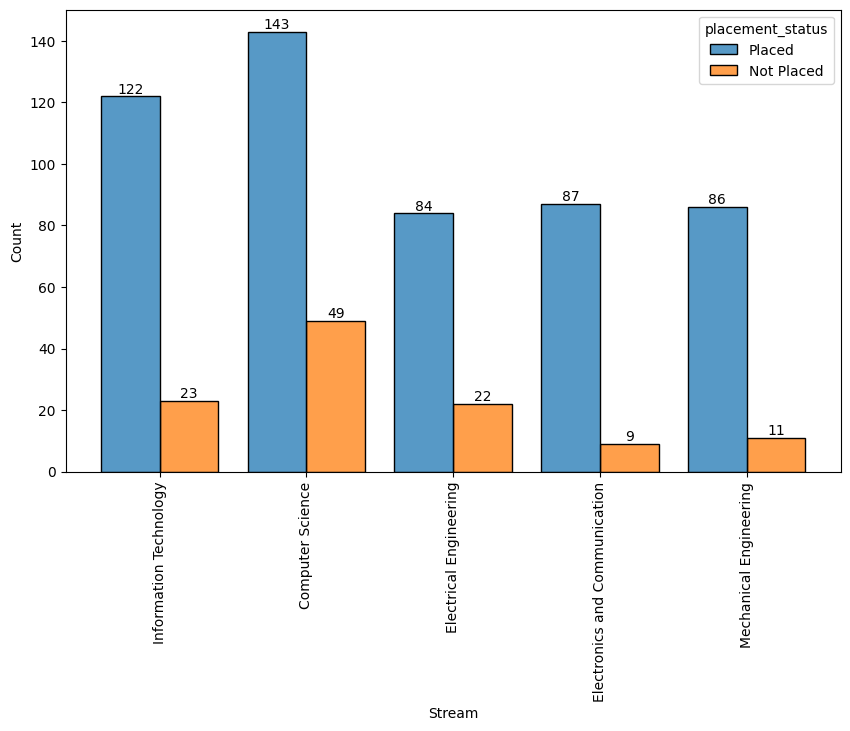

In [1255]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    x='stream',
    data=updated_df,
    hue='placement_status',
    multiple='dodge',
    shrink=0.8
)

plt.xticks(rotation=90)
plt.xlabel("Stream")
plt.ylabel("Count")


for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(
            p.get_x() + p.get_width() / 2,  
            height,                         
            int(height),                    
            ha='center', va='bottom', fontsize=10
        )

plt.show()


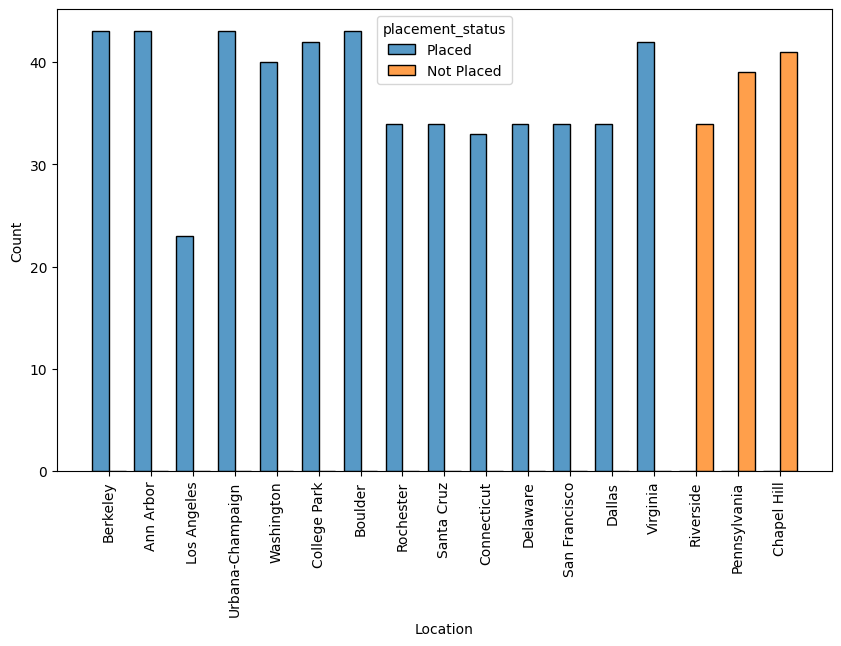

In [1256]:
plt.figure(figsize= (10, 6))
sns.histplot(x='location', data=updated_df, hue='placement_status', multiple='dodge', shrink=0.8)
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

In [1257]:
updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1258]:
updated_df[updated_df['years_of_experience'] == updated_df['years_of_experience'].unique()[3]]

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
395,545,Sophia Johnson,Female,24,Bachelor's,Mechanical Engineering,University of California--Santa Cruz,Placed,60000,3.7,2.177396,Santa Cruz


In [1259]:
updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1260]:
# gender, age, stream, college_name, placement_status, salary, gpa, years_of_experience

lst = ['gender', 'age', 'degree', 'college_name', 'stream', 'salary','gpa', 'placement_status']

for i in lst:
    print(f"Unique values for {i}: {list(updated_df[i].unique())}\n")

Unique values for gender: ['Male', 'Female']

Unique values for age: [26, 24, 23, 25]

Unique values for degree: ["Bachelor's"]

Unique values for college_name: ['University of California--Berkeley', 'University of Michigan--Ann Arbor', 'University of California--Los Angeles', 'University of Illinois--Urbana-Champaign', 'University of Washington', 'University of Maryland--College Park', 'University of Colorado--Boulder', 'University of Rochester', 'University of California--Santa Cruz', 'University of Connecticut', 'University of Delaware', 'University of California--San Francisco', 'University of Texas--Dallas', 'University of Virginia', 'University of California--Riverside', 'University of Pennsylvania', 'University of North Carolina--Chapel Hill']

Unique values for stream: ['Information Technology', 'Computer Science', 'Electrical Engineering', 'Electronics and Communication', 'Mechanical Engineering']

Unique values for salary: [63000, 64000, 66000, 62000, 65000, 61000, 60000, 670

In [1261]:
final_df = updated_df.drop(['name', 'location'], axis=1)

final_df.head()

,id,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,13,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0
1,14,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0
2,15,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0
3,18,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0
4,20,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0


In [1262]:
# Label Encoder

label_encoders = LabelEncoder()
string_cols = [col for col in final_df.columns if final_df[col].dtype == 'object']

for i in string_cols:
    final_df[i] = label_encoders.fit_transform(final_df[i])


Two dataframes are present without and with LabelEncoding [updated_df, final_df]

In [1263]:
updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California--Berkeley,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan--Ann Arbor,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California--Los Angeles,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois--Urbana-Champaign,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1264]:
df['college_name'].str.split('--')[0]

['Harvard University']

In [1265]:
def OnlyCollege(college):
    try:
        # Make sure it's a string
        college = str(college)
        # Split on '--' and take the first part
        return college.split('--')[0]
    except Exception:
        return college  # fallback in case of NaN or unexpected type

In [1266]:
updated_df['college_name'] = updated_df['college_name'].apply(OnlyCollege)

In [1267]:
updated_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,location
0,13,Daniel Martinez,Male,26,Bachelor's,Information Technology,University of California,Placed,63000,3.7,2.0,Berkeley
1,14,Mia Gonzalez,Female,24,Bachelor's,Computer Science,University of Michigan,Placed,64000,3.6,1.0,Ann Arbor
2,15,Alexander Rodriguez,Male,23,Bachelor's,Electrical Engineering,University of California,Placed,66000,3.8,3.0,Los Angeles
3,18,Olivia Moore,Female,24,Bachelor's,Electronics and Communication,University of Illinois,Placed,62000,3.8,1.0,Urbana-Champaign
4,20,Amelia Rivera,Female,25,Bachelor's,Computer Science,University of Washington,Placed,65000,3.6,1.0,Washington


In [1268]:
# Save location somewhere

final_df.head()

,id,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,13,1,26,0,3,0,1,63000,3.7,2.0
1,14,0,24,0,0,10,1,64000,3.6,1.0
2,15,1,23,0,1,1,1,66000,3.8,3.0
3,18,0,24,0,2,8,1,62000,3.8,1.0
4,20,0,25,0,0,16,1,65000,3.6,1.0


In [1269]:
final_df['college_name'].unique()

array([ 0, 10,  1,  8, 16,  9,  5, 13,  4,  6,  7,  3, 14, 15,  2, 12, 11])

In [1270]:
updated_df['college_name'].unique()

array(['University of California', 'University of Michigan',
       'University of Illinois', 'University of Washington',
       'University of Maryland', 'University of Colorado',
       'University of Rochester', 'University of Connecticut',
       'University of Delaware', 'University of Texas',
       'University of Virginia', 'University of Pennsylvania',
       'University of North Carolina'], dtype=object)

In [1271]:
final_df = final_df.drop(['degree'], axis=1)

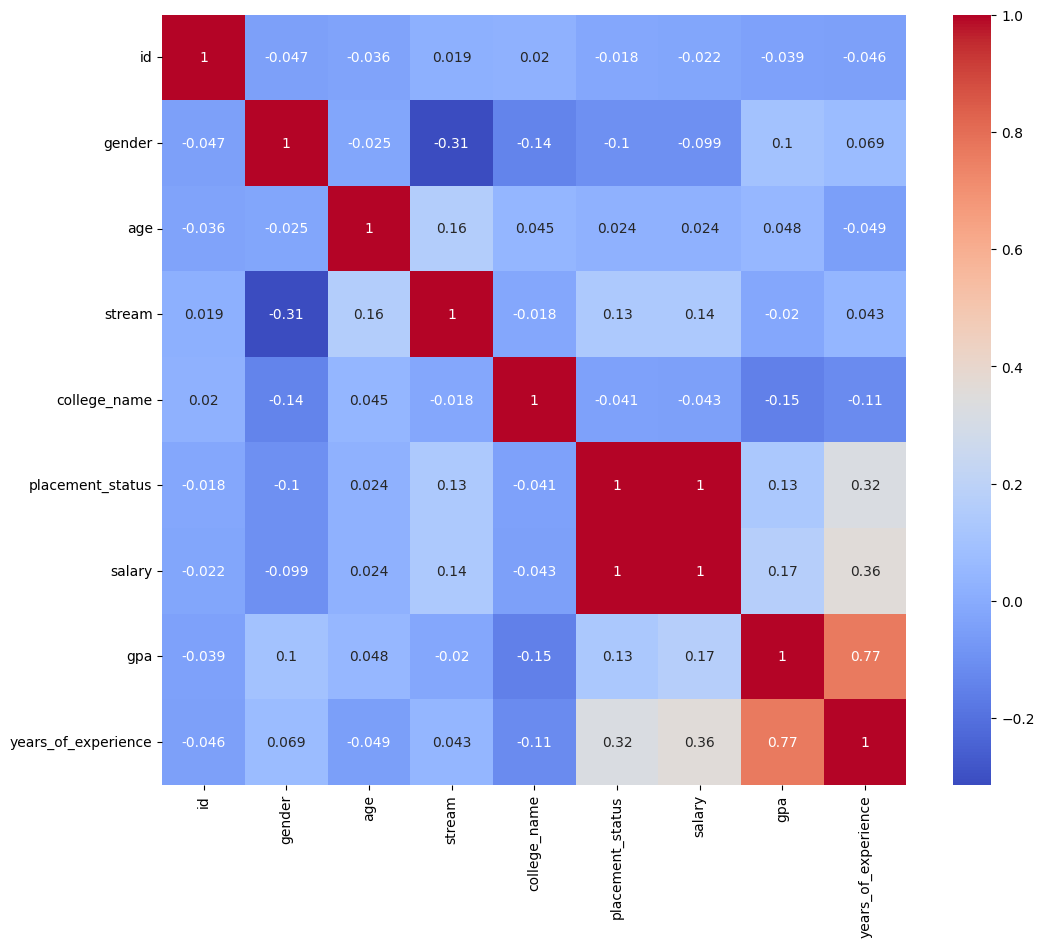

In [1272]:
plt.figure(figsize= (12, 10))
sns.heatmap(final_df.corr(), cmap='coolwarm', annot=True)
plt.show()

Train Test Split

In [1273]:
X = final_df.drop(['salary', 'id'], axis=1)
y = final_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1274]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 508 entries, 360 to 102
Series name: salary
Non-Null Count  Dtype
--------------  -----
508 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


Machine Learning Algorithm

In [1275]:
# Define function first
def training_regressor(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print("MSE: ", mse)
    print("r2: ", r2)
    return model  # <-- important

In [1276]:
# Initialize models
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(learning_rate=0.9)
lnr = LinearRegression()
xgbr = XGBRegressor(learning_rate=0.9)

models = [rfr, gbr, lnr, xgbr]
names = ["Random_Forest",  "Gradient_Boosting", "Linear_Regression", "XGBoost"]

In [1277]:
# list(models.values())[0]

In [1278]:
# Train and save
for i, j in zip(models, names):
    print("*" * 50)
    print(j)
    model = training_regressor(i)
    joblib.dump(model, f"{j}.pkl")  # save trained model
    print(f"{j}.pkl saved successfully!")
    print("*" * 50)

**************************************************
Random_Forest
MSE:  134072.1627161281
r2:  0.9998019532844797
Random_Forest.pkl saved successfully!
**************************************************
**************************************************
Gradient_Boosting
MSE:  59646.61939371539
r2:  0.999911892097334
Gradient_Boosting.pkl saved successfully!
**************************************************
**************************************************
Linear_Regression
MSE:  2421726.4062104654
r2:  0.9964227103455152
Linear_Regression.pkl saved successfully!
**************************************************
**************************************************
XGBoost
MSE:  151314.359375
r2:  0.9997764825820923
XGBoost.pkl saved successfully!
**************************************************


In [1282]:
final_df.head()

,id,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,13,1,26,3,0,1,63000,3.7,2.0
1,14,0,24,0,10,1,64000,3.6,1.0
2,15,1,23,1,1,1,66000,3.8,3.0
3,18,0,24,2,8,1,62000,3.8,1.0
4,20,0,25,0,16,1,65000,3.6,1.0


In [1279]:
# Save CSV
updated_df.to_csv("Dataset/Final.csv", index=False)